<a href="https://colab.research.google.com/github/mansi2606/News-Articles-Clustering/blob/main/News_Articles_CLustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
url='https://raw.githubusercontent.com/mansi2606/News-Articles-Clustering/main/NA.json'
data=pd.read_json(url)
data.head()

,Article,Preprocessed-Article,Vector
161,Iran jails blogger for 14 years\n\nAn Iranian ...,Iran jails blogger 14 years An Iranian weblogg...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
166,UK gets official virus alert site\n\nA rapid a...,UK gets official virus alert site A rapid aler...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
76,O'Sullivan could run in Worlds\n\nSonia O'Sull...,OSullivan could run Worlds Sonia OSullivan ind...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,Mutant book wins Guardian prize\n\nA book abou...,Mutant book wins Guardian prize A book evoluti...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
158,Microsoft seeking spyware trojan\n\nMicrosoft ...,Microsoft seeking spyware trojan Microsoft inv...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
 len(data['Vector'][4])
det=data['Vector']
vectors=pd.DataFrame(list(det))
vectors.head()
vectors.shape


(179, 8868)

# **SSE before PCA**

In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5)
kmeans.fit(vectors)
pred=kmeans.predict(vectors)
# centroids = kmeans.cluster_centers_
# cluster=pd.DataFrame(centroids)
# cluster=cluster.transpose()
# cluster.head()
# kmeanslabel=kmeans.labels_
sseb=kmeans.inertia_
print(sseb)
pred

164.25282253732112


array([4, 3, 1, 2, 3, 0, 0, 3, 4, 4, 2, 1, 0, 1, 1, 1, 3, 0, 4, 1, 0, 3,
       2, 4, 3, 2, 1, 2, 4, 3, 3, 1, 2, 4, 2, 0, 4, 1, 4, 4, 1, 2, 0, 4,
       4, 2, 2, 1, 1, 2, 3, 2, 3, 2, 1, 1, 4, 0, 4, 3, 1, 2, 0, 3, 0, 3,
       4, 2, 1, 0, 2, 2, 0, 2, 1, 0, 1, 4, 0, 4, 4, 0, 2, 2, 0, 3, 4, 0,
       1, 4, 2, 3, 3, 3, 4, 3, 4, 2, 4, 3, 2, 0, 2, 4, 0, 4, 4, 3, 4, 4,
       3, 0, 4, 4, 1, 0, 4, 0, 0, 4, 4, 0, 0, 3, 0, 0, 4, 4, 1, 0, 4, 2,
       0, 2, 0, 1, 4, 0, 4, 1, 3, 1, 0, 3, 4, 4, 2, 1, 2, 0, 1, 4, 1, 1,
       3, 2, 2, 2, 3, 1, 0, 0, 1, 0, 0, 2, 0, 2, 4, 3, 1, 4, 0, 4, 0, 0,
       4, 0, 2], dtype=int32)

In [ ]:
# inertia_list = []
# for num_clusters in np.arange(1, 21):
#     kmeans =KMeans(n_clusters=num_clusters)
#     kmeans.fit(vectors)
#     inertia_list.append(kmeans.inertia_)
# inertia_list

# **SSE after PCA**


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_vectors = sc.fit_transform(vectors)
scaled_vectors.shape
len(scaled_vectors)

179

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
pca_vectors = pca.fit_transform(vectors)
pca_vectors.shape


# newvectors=pd.DataFrame(pca_vectors)
# pca_vectors # one row per sample, each column for a component PC1, PC2...

(179, 100)

In [ ]:
vectorspca=kmeans.fit(pca_vectors)
predpca=kmeans.predict(pca_vectors)
centroids1=kmeans.cluster_centers_
SSE=kmeans.inertia_
# inertia_list1=[]
# for n in range(1,21):
#   kmeans=KMeans(n_clusters=n)
#   kmeans.fit(pca_vectors)
#   inertia_list1.append(kmeans.inertia_)
# inertia_list1
# centroids1.shape
# cluster1=pd.DataFrame(centroids1)
# cluster1=cluster1.transpose()
# cluster1.describe()
# kmlblwithpca=kmeans.labels_
# kmlblwithpca
# kmeans.inertia_
SSE
predpca

array([4, 4, 1, 2, 0, 1, 1, 4, 1, 4, 2, 1, 4, 1, 1, 1, 3, 4, 2, 3, 4, 4,
       2, 4, 4, 2, 1, 2, 4, 4, 4, 1, 2, 2, 2, 2, 4, 3, 4, 4, 1, 2, 1, 4,
       2, 2, 2, 1, 1, 4, 4, 2, 4, 2, 3, 1, 4, 4, 4, 2, 1, 2, 4, 4, 4, 0,
       2, 2, 1, 4, 2, 2, 4, 2, 3, 2, 1, 2, 4, 4, 2, 2, 2, 2, 1, 4, 2, 2,
       1, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 4, 3, 2, 4, 4, 1, 2,
       0, 1, 2, 2, 1, 1, 2, 4, 4, 1, 1, 4, 2, 4, 3, 4, 4, 2, 3, 1, 4, 1,
       4, 2, 4, 3, 2, 4, 2, 1, 4, 1, 4, 4, 4, 4, 2, 3, 2, 4, 1, 2, 3, 1,
       4, 1, 2, 2, 0, 1, 1, 4, 1, 4, 4, 1, 1, 2, 4, 4, 1, 4, 4, 4, 4, 4,
       4, 4, 2], dtype=int32)

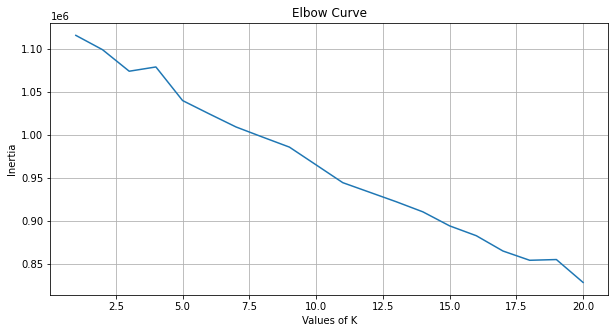

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, 21), inertia_list1)
plt.grid(True)
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

In [ ]:
data['kmeans']=pred
data['kmeanswithpca']=predpca
data.head()



,Article,Preprocessed-Article,Vector,kmeanslabel,kmeanslabelwithpca,kmeans,kmeanswithpca
161,Iran jails blogger for 14 years\n\nAn Iranian ...,Iran jails blogger 14 years An Iranian weblogg...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,4,4,4
166,UK gets official virus alert site\n\nA rapid a...,UK gets official virus alert site A rapid aler...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,4,3,4
76,O'Sullivan could run in Worlds\n\nSonia O'Sull...,OSullivan could run Worlds Sonia OSullivan ind...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,1,1,1
8,Mutant book wins Guardian prize\n\nA book abou...,Mutant book wins Guardian prize A book evoluti...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,2,2,2
158,Microsoft seeking spyware trojan\n\nMicrosoft ...,Microsoft seeking spyware trojan Microsoft inv...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,0,3,0


In [ ]:
data['kmeanslabel'].value_counts()

4    45
0    42
2    34
1    31
3    27
Name: kmeanslabel, dtype: int64

In [ ]:
data['kmeanslabelwithpca'].value_counts()

4    71
2    54
1    39
3    11
0     4
Name: kmeanslabelwithpca, dtype: int64

In [ ]:
for each,subset in data.groupby('kmeanswithpca'):
    print ("For Label :",each)
    if each==3:
        lst= ' '.join(subset['Preprocessed-Article']).lower().split()[:50]
        print(lst)
        print()

kpca=lst[49]
print(kpca)

For Label : 0
For Label : 1
For Label : 2
For Label : 3
['playstation', '3', 'chip', 'unveiled', 'details', 'chip', 'designed', 'power', 'sony', 'playstation', '3', 'console', 'released', 'san', 'francisco', 'monday', 'sony', 'ibm', 'toshiba', 'working', 'cell', 'processor', 'three', 'years', 'unveil', 'chip', 'technology', 'conference', 'the', 'chip', 'reported', '10', 'times', 'faster', 'current', 'processors', 'it', 'designed', 'use', 'graphics', 'workstations', 'new', 'playstation', 'console', 'described', 'supercomputer', 'chip', 'sony', 'said', 'cell']

For Label : 4
cell


In [ ]:
for each,subset in data.groupby('kmeans'):
    print ("For Label :",each)
    if each==1:
        lst= ' '.join(subset['Preprocessed-Article']).lower().split()[:50]
        print(lst)
        print()

k=lst[49]
print(k)


For Label : 0
For Label : 1
['osullivan', 'could', 'run', 'worlds', 'sonia', 'osullivan', 'indicated', 'would', 'like', 'participate', 'next', 'month', 'world', 'cross', 'country', 'championships', 'st', 'etienne', 'athletics', 'ireland', 'hinted', '35yearold', 'cobh', 'runner', 'may', 'included', 'official', 'lineup', 'event', 'france', '1920', 'march', 'provincial', 'teams', 'selected', 'last', 'saturday', 'nationals', 'santry', 'officially', 'announced', 'week', 'osullivan', 'present', 'preparing', 'london', 'marathon', '17', 'april', 'the']

For Label : 2
For Label : 3
For Label : 4
the
